In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# csv_path_2014 = "../data/Medicare_Provider_Charge_Inpatient_DRGALL_FY2014.csv"
# df_2014 = pd.read_csv(csv_path_2014)
# df_2014.head()

In [3]:
# The path to our CSV files
csv_path_2011 = "../data/Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv"
csv_path_2012 = "../data/Medicare_Provider_Charge_Inpatient_DRG100_FY2012.csv"
csv_path_2013 = "../data/Medicare_Provider_Charge_Inpatient_DRG100_FY2013.csv"
csv_path_2014 = "../data/Medicare_Provider_Charge_Inpatient_DRGALL_FY2014.csv"
csv_path_2015 = "../data/Medicare_Provider_Charge_Inpatient_DRGALL_FY2015.csv"

# Read our data into pandas
df_2011 = pd.read_csv(csv_path_2011)
df_2011['year'] = '2011'
df_2012 = pd.read_csv(csv_path_2012)
df_2012['year'] = '2012'
df_2013 = pd.read_csv(csv_path_2013)
df_2013['year'] = '2013'
df_2014 = pd.read_csv(csv_path_2014)
df_2014['year'] = '2014'
df_2015 = pd.read_csv(csv_path_2015)
df_2015['year'] = '2015'

df = pd.concat([df_2011,df_2012,df_2013,df_2014,df_2015])

In [4]:
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,year
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264,2011
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286,2011
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37500,5434.958333,4453.791667,2011
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28000,5417.560000,4129.160000,2011
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27778,5658.333333,4851.444444,2011


In [5]:
yeargroup = df.groupby('year')
revised_yeargroup = yeargroup.sum()
reduced_yeargroup = revised_yeargroup.loc[:, ["Total Discharges"]]
reduced_yeargroup.head()

,Total Discharges
year,
2011,6975318
2012,6662965
2013,6517112
2014,7297885
2015,7433268


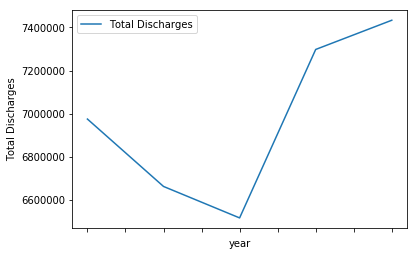

In [6]:
yearly_discharges = reduced_yeargroup.plot(kind='line')

yearly_discharges.set_xlabel("year")
yearly_discharges.set_ylabel("Total Discharges")

plt.show()

In [7]:
yearly_payments = revised_yeargroup.loc[:, ["Average Medicare Payments"]]
yearly_payments = yearly_payments.rename(columns = {"Average Medicare Payments": "Total Medicare Payment"})
yearly_payments.head()

,Total Medicare Payment
year,
2011,1.385155e+09
2012,1.376933e+09
2013,1.359168e+09
2014,2.273489e+09
2015,2.263819e+09


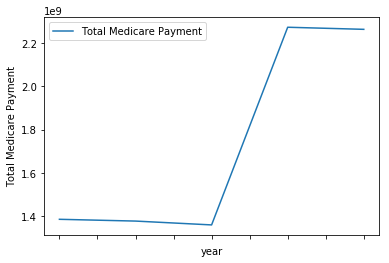

In [8]:
yearly_payments_plot = yearly_payments.plot(kind='line')

yearly_payments_plot.set_xlabel("year")
yearly_payments_plot.set_ylabel("Total Medicare Payment")

plt.show()

#Note: I would like to do medicare payment by region as well as total discharges by region, though this would mean editing our data